# Final Team Project

# Andrew Kim, Luis Perez, Renetta Nelson

# October 17, 2022

## Problem Statement

>The purpose of this project is to automate the wine selection process in order to increase profit and
build on the business's reputation. This will be done by implementing a model that predicts the
quality of the wine. The profit margin of restaurants is approximately 70%. This means that over half the profit of
these business types come from wine. On the other hand, there are also major expenses that pertain
to wine as well. From vendors to sommeliers, there are dozens of additional expenses when it
comes to finding and purchasing good quality wine. The profits of the business can no longer support the expenses of the wine selection process. Within a few months, the expenses will exceed the profits of the business and the business will
have to close down. The automation of the wine selection process will reduce the expenses by
approximately 25%, allowing the business to build its finances and stay in business.




In [121]:
#Import Libraries

import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from dmba import classificationSummary, gainsChart, liftChart
import scikitplot as skplt
import matplotlib.pyplot as plt
from dmba.metric import AIC_score
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.metrics import r2_score, plot_confusion_matrix
import seaborn as sns

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import matplotlib.pylab as plt
import dmba
from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_curve, roc_auc_score, confusion_matrix

In [58]:
#load dataset and put into a data frame

redwine_data = pd.read_csv('/db/winequality-red.csv')

redwine_df = pd.DataFrame(redwine_data)

#Display first five rows of dataframe to confirm 

redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing

>Data Preprocessing Explanation for this section -> Can do a quick summary here, talking about each of the processes that are being done for data preprocessing

In [59]:
# Check type of variables
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [60]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
# Check for data size
redwine_df.shape

(1599, 12)

In [62]:
redwine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [63]:
redwine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [64]:
redwine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [65]:
# Removing Outliers

#based on the boxplots total sulfur dioxide has many outliers
d1= redwine_df['total sulfur dioxide']
mean = np.mean(redwine_df['total sulfur dioxide'])
std = np.std(redwine_df['total sulfur dioxide'])
print('mean of the dataset is', mean)
print('std. deviation is', std)


#z method
#total sulfur dioxide
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(redwine_df['total sulfur dioxide'])



#z method
#free sulfur dioxide
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(redwine_df['free sulfur dioxide'])

mean of the dataset is 46.46779237023139
std. deviation is 32.88503665178367
Outliers: [148.0, 153.0, 165.0, 151.0, 149.0, 147.0, 148.0, 155.0, 151.0, 152.0, 278.0, 289.0, 160.0, 147.0, 147.0]
Outliers: [52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52.0, 51.0, 57.0, 50.0, 48.0, 48.0, 72.0, 51.0, 51.0, 52.0, 55.0, 55.0, 48.0, 48.0, 66.0]


<AxesSubplot:>

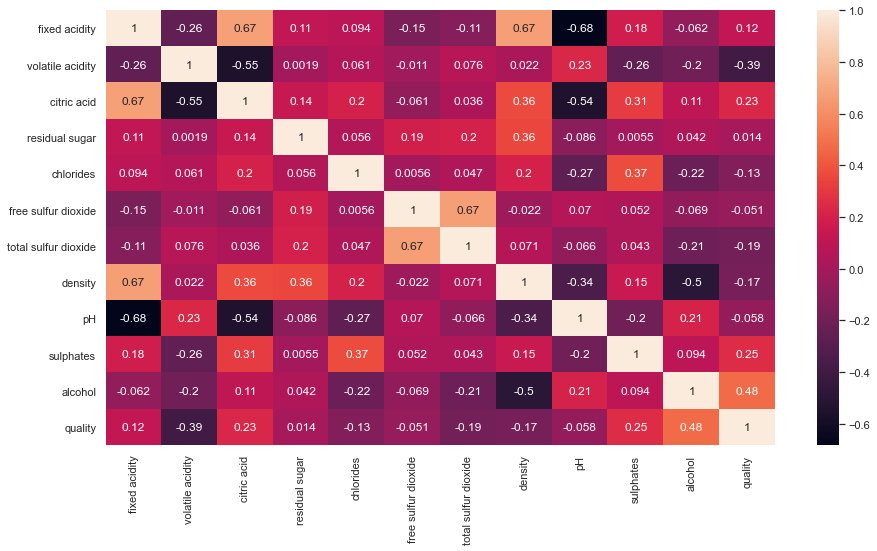

In [66]:
plt.figure(figsize = (15, 8))

sns.heatmap(redwine_df.corr(), annot = True)

# Explanatory Data Analysis (EDA)

> Explorory Data Analysis recap

In [69]:
redwine_df['good_quality'] = [1 if x>=6 else 0 for x in redwine_df['quality']]



Text(0, 0.5, 'Count')

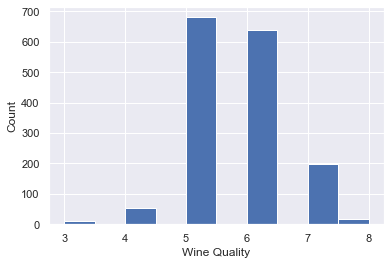

In [17]:
#Create histogram on 'quality' variable
sns.set()
redwine_df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In [53]:
new=[]
for row in redwine_df['quality']:
    if (row>=7):
        val=3
    elif (row>=5):
        val=2
    else:
        val=1
    new.append(val)
redwine_df['ranking']=new

In [56]:
redwine_df['ranking'].unique()

array([2, 3, 1], dtype=int64)

>> Explanation:

Text(0.5, 1.0, 'Relationship Between Fixed Acidity and Quality')

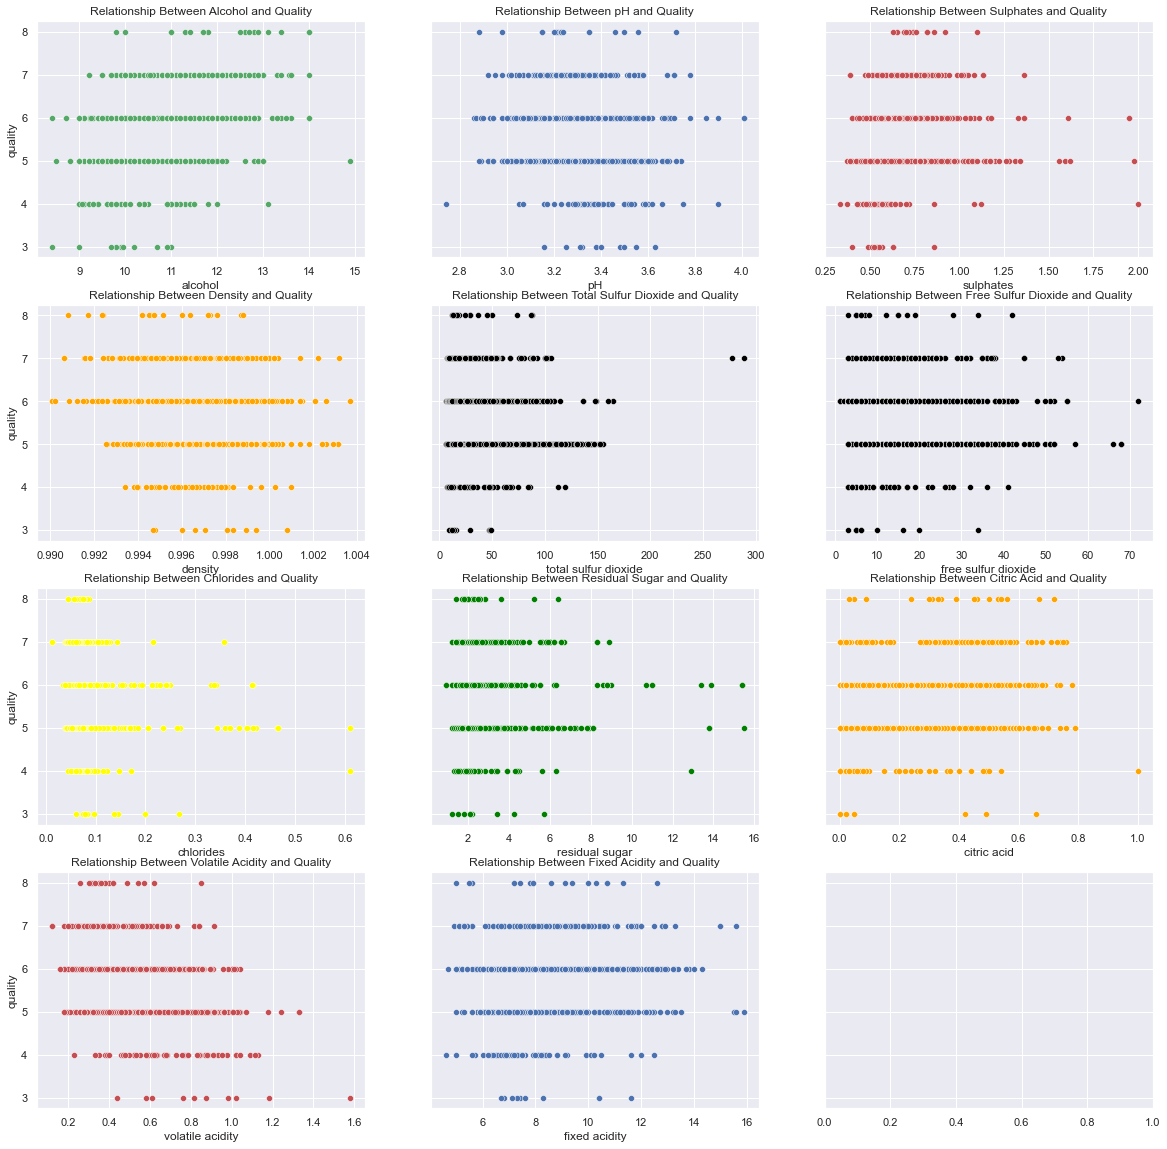

In [18]:
# Analyze the relationships between the predictors and the target variable ('quality').


fig, axes = plt.subplots(4, 3, figsize = (20,20), sharey = True)


sns.scatterplot(ax = axes[0,0], data = redwine_df, y = "quality", x = "alcohol", color = "g")
axes[0,0].set_title("Relationship Between Alcohol and Quality")

sns.scatterplot(ax = axes[0, 1], data = redwine_df, y = "quality", x = "pH", color = "b")
axes[0,1].set_title("Relationship Between pH and Quality")

sns.scatterplot(ax = axes[0, 2], data = redwine_df, y = "quality", x = "sulphates", color = "r")
axes[0,2].set_title("Relationship Between Sulphates and Quality")

sns.scatterplot(ax = axes[1,0], data = redwine_df, y = "quality", x = "density", color = "orange")
axes[1,0].set_title("Relationship Between Density and Quality")

sns.scatterplot(ax = axes[1,1], data = redwine_df, y = "quality", x = "total sulfur dioxide", color = "black")
axes[1,1].set_title("Relationship Between Total Sulfur Dioxide and Quality")

sns.scatterplot(ax = axes[1,2], data = redwine_df, y = "quality", x = "free sulfur dioxide", color = "black")
axes[1,2].set_title("Relationship Between Free Sulfur Dioxide and Quality")

sns.scatterplot(ax = axes[2,0], data = redwine_df, y = "quality", x = "chlorides", color = "yellow")
axes[2,0].set_title("Relationship Between Chlorides and Quality")

sns.scatterplot(ax = axes[2,1], data = redwine_df, y = "quality", x = "residual sugar", color = "green")
axes[2,1].set_title("Relationship Between Residual Sugar and Quality")

sns.scatterplot(ax = axes[2,2], data = redwine_df, y = "quality", x = "citric acid", color = "orange")
axes[2,2].set_title("Relationship Between Citric Acid and Quality")

sns.scatterplot(ax = axes[3,0], data = redwine_df, y = "quality", x = "volatile acidity", color = "r")
axes[3,0].set_title("Relationship Between Volatile Acidity and Quality")

sns.scatterplot(ax = axes[3,1], data = redwine_df, y = "quality", x = "fixed acidity", color = "b")
axes[3,1].set_title("Relationship Between Fixed Acidity and Quality")







>> Explanation:

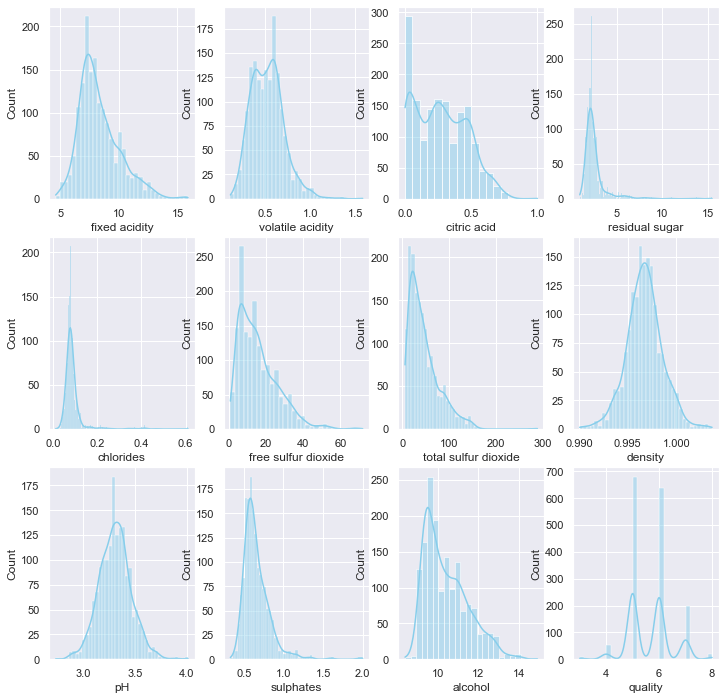

In [19]:
# Histogram

fig, axs = plt.subplots(3, 4, figsize=(12, 12))
columns = redwine_df.columns[:12]
k=0
sns.set(font_scale=1)
for i in range(3):
    for j in range(4):
        sns.histplot(data=redwine_df, x=columns[k], kde=True, color="skyblue", ax=axs[i, j])
        k+=1

>> **Explanation:** 
Based on the histograms above we can see each columns distribution. We can see that fixed acidity, density, and PH have normal distributions. While the other columns do not follow normal distributions. Volatile acidity, citric acid, and quality appear to have more of a bimodal or multimodial distribution. One of the columns that jumps out is quality as per our objective is to automate the wine selection we can transform the quality selection to better fit a normal distribution to have a better understandment of the what makes a wine be good quality. 

Text(0.5, 1.0, 'Fixed Acidity vs. Quality')

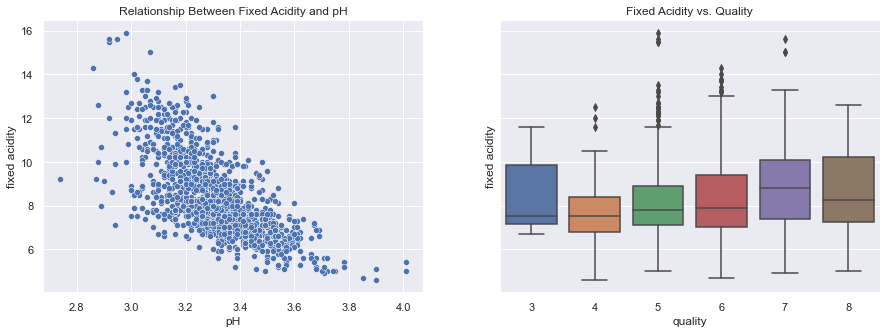

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sns.scatterplot(ax = axes[0], data = redwine_df, y = "fixed acidity", x = "pH")
axes[0].set_title("Relationship Between Fixed Acidity and pH")

sns.boxplot(ax = axes[1], data = redwine_df, y = "fixed acidity", x = "quality")
axes[1].set_title("Fixed Acidity vs. Quality")

>> Explanation:

Text(0.5, 1.0, 'Residual Sugar vs. Quality')

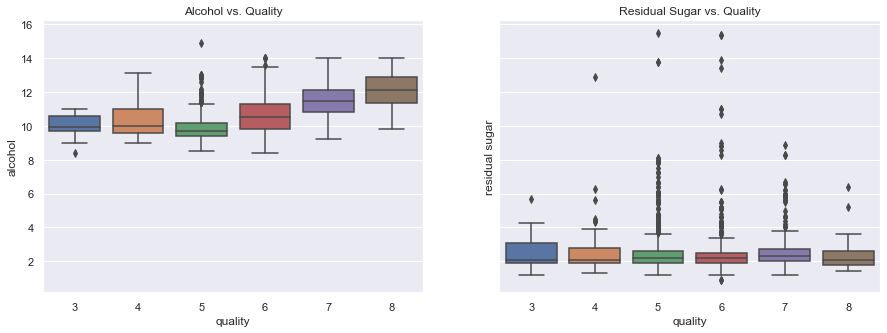

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sns.boxplot(ax = axes[0], data = redwine_df, y = "alcohol", x = "quality")
axes[0].set_title("Alcohol vs. Quality")

sns.boxplot(ax = axes[1], data = redwine_df, y = "residual sugar", x = "quality")
axes[1].set_title("Residual Sugar vs. Quality")

>> Explanation


# Data Splitting

In [88]:
#redwine_df= redwine_df.drop(columns=['quality'])
redwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [89]:
y = redwine_df['good_quality'].to_numpy()
x = redwine_df.drop(columns=['good_quality'])

In [90]:
#Standardize the dataset
scaler = preprocessing.StandardScaler()
x_norm = scaler.fit_transform(x * 1.0)

In [91]:
#Split the full dataframe into 60/40.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=1)
train_x.shape, test_x.shape

((959, 11), (640, 11))

# Data Modeling

### LDA

In [92]:
# initializing the model with 2 components
lda = LinearDiscriminantAnalysis(n_components=1)

# fitting the dataset
X_r2 = lda.fit(x, y).transform(x)

In [134]:
#accuracy and confusion matrix
classificationSummary(test_y, lda.predict(test_x))

lda_pred_t = lda.predict(train_x)
lda_pred_v = lda.predict(test_x)
lda_pred_prob_v = (gb.predict_proba(test_x))


#Cross Validation Score of LDA
print("\n")
lda_score = cross_val_score(lda, train_x, train_y, cv=10)
CV_lda = lda_score.mean().round(5)*100
print("Mean Score:", CV_lda,'%')
print("\n")


y_hat = lda.predict(train_x)
print(classification_report(train_y,y_hat))

Confusion Matrix (Accuracy 0.7562)

       Prediction
Actual   0   1
     0 228  70
     1  86 256


Mean Score: 73.727 %


              precision    recall  f1-score   support

           0       0.71      0.73      0.72       446
           1       0.76      0.74      0.75       513

    accuracy                           0.74       959
   macro avg       0.74      0.74      0.74       959
weighted avg       0.74      0.74      0.74       959



In [135]:
#test performance table
data = [accuracy_score(test_y, lda_pred_v, normalize=True), 
        precision_score(test_y, lda_pred_v),
        recall_score(test_y, lda_pred_v),
        fbeta_score(test_y, lda_pred_v, beta=1),
        fbeta_score(test_y, lda_pred_v, beta=2),
        fbeta_score(test_y, lda_pred_v, beta=0.5),
        roc_auc_score(test_y, lda_pred_v)
       ]

test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Training_Performance_Table = pd.DataFrame(data, 
                                          index = test_names, 
                                          columns = ['LDA'])

In [136]:
Training_Performance_Table

,LDA
Accuracy,0.756250
Precision,0.785276
Recall,0.748538
F1,0.766467
F2,0.755608
F0.5,0.777643
AUC ROC,0.756819


### Gradient Boosting

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import classification_report, confusion_matrix

In [96]:
gradient_booster = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [28]:
cv = GridSearchCV(gradient_booster,parameters,cv=5)
cv.fit(x,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [97]:
## Print out the best Parameters.
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [98]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


0.426 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.548 + or -0.049 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.576 + or -0.047 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.582 + or -0.032 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.493 + or -0.02 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.57 + or -0.035 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.586 + or -0.019 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.575 + or -0.008 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.498 + or -0.021 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.582 + or -0.024 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.572 + or -0.026 for the {'learning_rate': 0.01, 'max_de

In [99]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=250)

## Fit our model
gb.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)

In [125]:
classificationSummary(test_y, gb.predict(test_x))


gb_pred_t = gb.predict(train_x)
gb_pred_v = gb.predict(test_x)
gb_pred_prob_v = (gb.predict_proba(test_x))

#Cross Validation Score of LDA
print("\n")
lda_score = cross_val_score(lda, train_x, train_y, cv=10)
CV_lda = lda_score.mean().round(5)*100
print("Mean Score:", CV_lda,'%')
print("\n")

# make prediction
y_hat = gb.predict(test_x)
print(classification_report(test_y,y_hat))

Confusion Matrix (Accuracy 0.7531)

       Prediction
Actual   0   1
     0 226  72
     1  86 256


Mean Score: 73.727 %


              precision    recall  f1-score   support

           0       0.72      0.76      0.74       298
           1       0.78      0.75      0.76       342

    accuracy                           0.75       640
   macro avg       0.75      0.75      0.75       640
weighted avg       0.75      0.75      0.75       640



In [143]:
#test performance table
data = [accuracy_score(test_y, gb_pred_v, normalize=True), 
        precision_score(test_y, gb_pred_v),
        recall_score(test_y, gb_pred_v),
        fbeta_score(test_y, gb_pred_v, beta=1),
        fbeta_score(test_y, gb_pred_v, beta=2),
        fbeta_score(test_y, gb_pred_v, beta=0.5),
        roc_auc_score(test_y, gb_pred_v)
       ]

Training_Performance_Table['Gradient Boosting'] = data

In [138]:
Training_Performance_Table

,LDA,Gradient Boosting
Accuracy,0.756250,0.753125
Precision,0.785276,0.780488
Recall,0.748538,0.748538
F1,0.766467,0.764179
F2,0.755608,0.754717
F0.5,0.777643,0.773881
AUC ROC,0.756819,0.753464


### Logistic Regression

In [151]:
Logit_reg = LogisticRegression()
Logit_reg.fit(train_x, train_y)
pred_y = Logit_reg.predict(test_x)


Logitreg_acc = accuracy_score(test_y, pred_y)
print("Accuracy Score:", Logitreg_acc)

print(classification_report(test_y, pred_y))



#Cross Validation Score of logistic regression
LR_score = cross_val_score(Logit_reg, train_x, train_y, cv=10)
CV_LR = LR_score.mean().round(5)*100
print("Mean Score:", CV_LR,'%')

lr_pred_t = Logit_reg.predict(train_x)
lr_pred_v = Logit_reg.predict(test_x)
lr_pred_prob_v = (Logit_reg.predict_proba(test_x))


Accuracy Score: 0.74375
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       298
           1       0.76      0.76      0.76       342

    accuracy                           0.74       640
   macro avg       0.74      0.74      0.74       640
weighted avg       0.74      0.74      0.74       640

Mean Score: 74.14500000000001 %


In [152]:
#test performance table
data = [accuracy_score(test_y, lr_pred_v, normalize=True), 
        precision_score(test_y, lr_pred_v),
        recall_score(test_y, lr_pred_v),
        fbeta_score(test_y, lr_pred_v, beta=1),
        fbeta_score(test_y, lr_pred_v, beta=2),
        fbeta_score(test_y, lr_pred_v, beta=0.5),
        roc_auc_score(test_y, lr_pred_v)
       ]

Training_Performance_Table['Logistic Regression'] = data
Training_Performance_Table

,LDA,Gradient Boosting,Random Forest,Logistic Regression
Accuracy,0.756250,0.753125,0.798438,0.743750
Precision,0.785276,0.780488,0.829721,0.758721
Recall,0.748538,0.748538,0.783626,0.763158
F1,0.766467,0.764179,0.806015,0.760933
F2,0.755608,0.754717,0.792431,0.762266
F0.5,0.777643,0.773881,0.820073,0.759604
AUC ROC,0.756819,0.753464,0.799531,0.742317


### Random Forest

In [140]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_pred = rf.predict(test_x)

rf_acc = accuracy_score(test_y, rf_pred)
print("Accuracy Score:", rf_acc)

print(classification_report(test_y, rf_pred))


#Cross Validation Score of random forest
RF_score = cross_val_score(rf, train_x, train_y, cv=10)
CV_RF = RF_score.mean().round(5)*100
print("Mean Score:", CV_RF,'%')


rf_pred_t = rf.predict(train_x)
rf_pred_v = rf.predict(test_x)
rf_pred_prob_v = (rf.predict_proba(test_x))

Accuracy Score: 0.7984375
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       298
           1       0.83      0.78      0.81       342

    accuracy                           0.80       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.80      0.80       640

Mean Score: 80.193 %


In [144]:
#test performance table
data = [accuracy_score(test_y, rf_pred_v, normalize=True), 
        precision_score(test_y, rf_pred_v),
        recall_score(test_y, rf_pred_v),
        fbeta_score(test_y, rf_pred_v, beta=1),
        fbeta_score(test_y, rf_pred_v, beta=2),
        fbeta_score(test_y, rf_pred_v, beta=0.5),
        roc_auc_score(test_y, rf_pred_v)
       ]

Training_Performance_Table['Random Forest'] = data
Training_Performance_Table

,LDA,Gradient Boosting,Random Forest
Accuracy,0.756250,0.753125,0.798438
Precision,0.785276,0.780488,0.829721
Recall,0.748538,0.748538,0.783626
F1,0.766467,0.764179,0.806015
F2,0.755608,0.754717,0.792431
F0.5,0.777643,0.773881,0.820073
AUC ROC,0.756819,0.753464,0.799531


### Decision Trees

### K-Nearest Neighbors (KNN) [Might change]

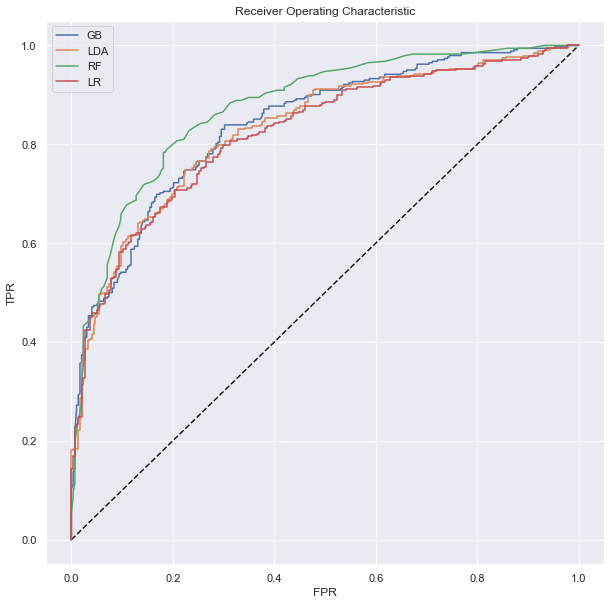

In [154]:
y_pred_prob1 = gb.predict_proba(test_x)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(test_y, y_pred_prob1)

y_pred_prob2 = lda.predict_proba(test_x)[:,1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(test_y, y_pred_prob2)

y_pred_prob3 = rf.predict_proba(test_x)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_pred_prob3)

y_pred_prob4 = Logit_reg.predict_proba(test_x)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, y_pred_prob4)

plt.figure(figsize = (10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_gb, tpr_gb, label = 'GB')
plt.plot(fpr_lda, tpr_lda, label = 'LDA')
plt.plot(fpr_rf, tpr_rf, label = 'RF')
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()